In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
housing = pd.read_csv("house_train.csv",index_col=0)

In [3]:
housing['Age']=housing['YrSold']-housing['YearBuilt']

In [4]:
housing

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,91
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,8
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,32
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,69


In [5]:
counts= housing['Neighborhood'].value_counts()
more_than_30 = list(counts[counts>30].index)
housing=housing.loc[housing['Neighborhood'].isin(more_than_30)]

In [6]:
#housing.info()

In [7]:
features=['CentralAir','LotArea','OverallQual','OverallCond','1stFlrSF','2ndFlrSF','Age','BedroomAbvGr',]
target='SalePrice'

In [8]:
#Neighborhood
dummies_nb=pd.get_dummies(housing['Neighborhood'],drop_first=True)
housing=pd.concat([housing,dummies_nb],axis=1)
#CentralAir
housing['CentralAir']=housing['CentralAir'].map({'N':0,'Y':1}).astype(int)

In [9]:
features += list(dummies_nb.columns)

In [10]:
X=housing[features].values
y=housing[target].values
n=housing.shape[0]

In [11]:
y_mean=np.mean(y)
y_mean

180167.63358778626

In [12]:
RMSE_null_model=np.sqrt(np.sum((y-y_mean)**2)/n)
RMSE_null_model

78032.94485454109

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
regressor = LinearRegression()

In [15]:
regressor.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
housing['Predictions']=regressor.predict(X)

In [17]:
y_pred= housing['Predictions'].values

In [18]:
RMSE_regressor=np.sqrt(np.sum((y-y_pred)**2)/n)
RMSE_regressor

33729.21817336611

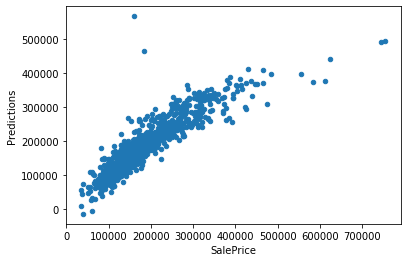

In [19]:
housing.plot.scatter(x='SalePrice',y='Predictions');

In [21]:
new_house = np.array([[0, 12000, 6, 6, 1200, 500, 3, 5, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]])
prediction = regressor.predict(new_house)
print("For a house with the following characteristics:\n")
for feature, feature_value in zip(features, new_house[0]):
    if feature_value > 0:
        print("{}: {}".format(feature, feature_value))
print("\nThe predictied value for the house is: {:,}".format(round(prediction[0])))

For a house with the following characteristics:

LotArea: 12000
OverallQual: 6
OverallCond: 6
1stFlrSF: 1200
2ndFlrSF: 500
Age: 3
BedroomAbvGr: 5
Timber: 1

The predictied value for the house is: 206,308.0
